In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pylab
from os import scandir
import contextlib

/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


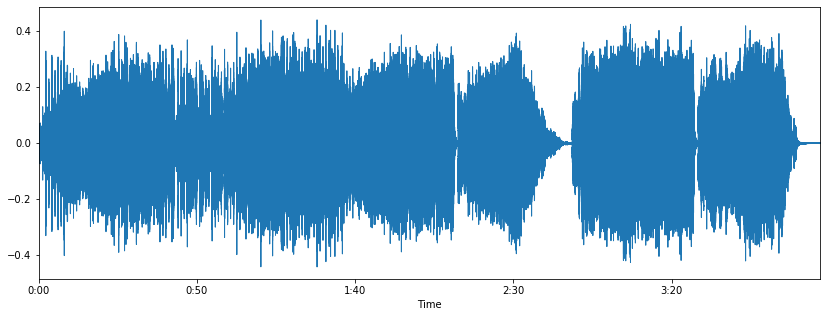

In [2]:
filename = '../../../PDG-Data/Songs/313.mp3'
y, sr = librosa.load(filename)
# trim silent edges
plt.figure(figsize=(14, 5))
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

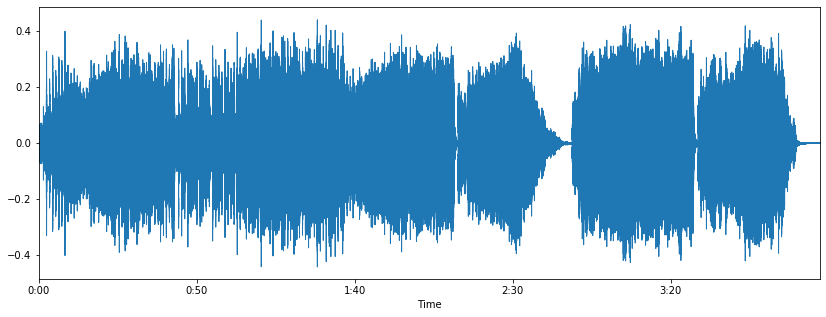

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr)

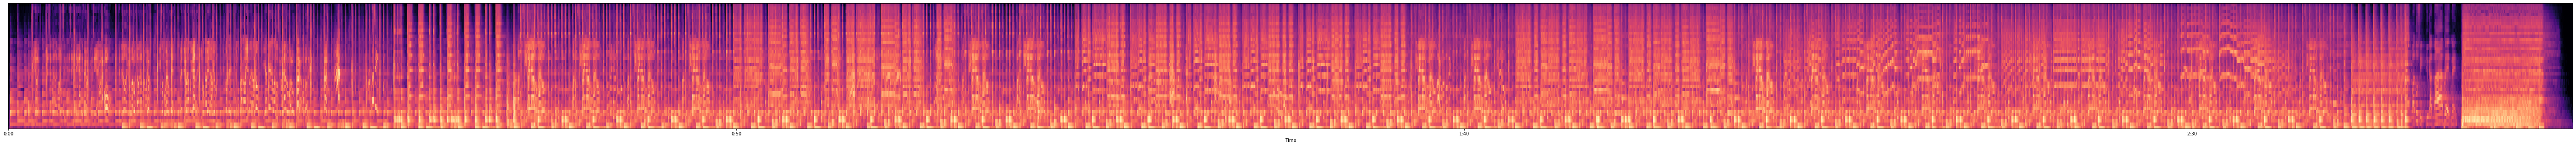

In [49]:
save_path = "./Data/Spectrograms/313.jpg"

n_mels = 40
hop_length = 512
n_fft = 2048

fig, ax1 = plt.subplots(1,1, figsize = (100,5))
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
#librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
#                         x_axis='time', y_axis='mel');

librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time');


#plt.colorbar(format='%+2.0f dB');

#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()
plt.show()

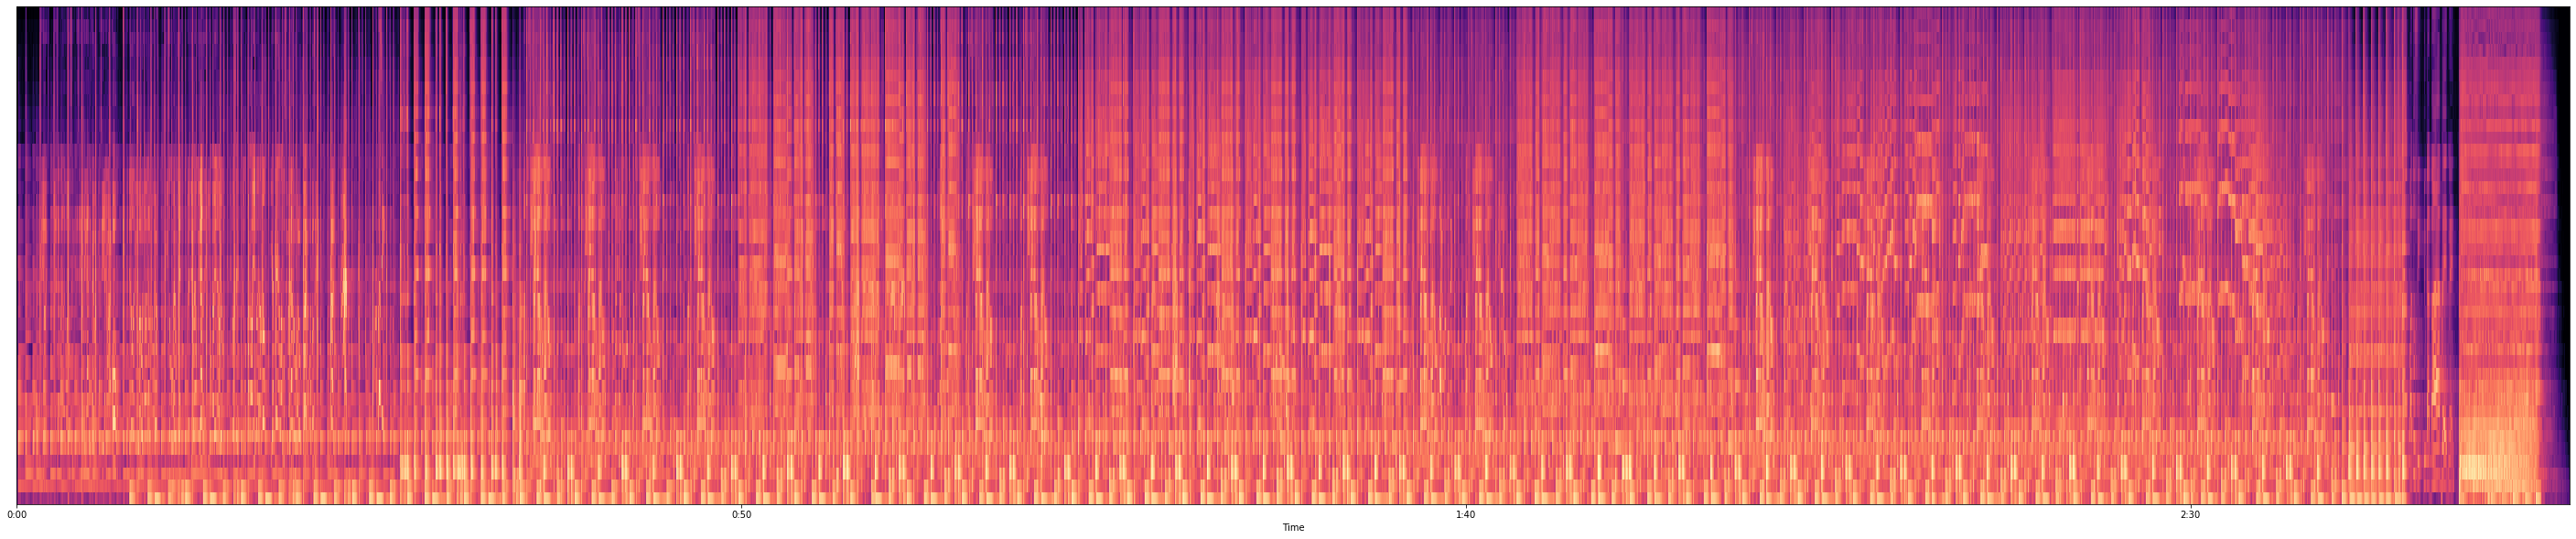

In [51]:
save_path = "./Data/Spectrograms/313.jpg"

n_mels = 40
hop_length = 512
n_fft = 2048

fig, ax1 = plt.subplots(1,1, figsize = (50,10))
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
#librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
#                         x_axis='time', y_axis='mel');

librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time');


#plt.colorbar(format='%+2.0f dB');

#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()
plt.show()

In [3]:
def ls(path): 
    return [obj.name for obj in scandir(path) if obj.is_file()]

In [52]:
path = '../../../PD/cancionesytags'
songs = ls(path)
msg = ""
for song in songs:
    print(song)
    data = song.split(".")
    if data[1] == "wav":
        file_path = path+"/"+song
        
        
        y, sr = librosa.load(file_path)
        # trim silent edges
        #plt.figure(figsize=(14, 5))
        whale_song, _ = librosa.effects.trim(y)
        save_path = "./Data/Spectrograms/"+data[0]+".png"

        n_mels = 40
        hop_length = 512
        n_fft = 2048

        fig, ax1 = plt.subplots(1,1, figsize = (50,10))
        S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                           hop_length=hop_length, 
                                           n_mels=n_mels)
        S_DB = librosa.power_to_db(S, ref=np.max)
        #librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
        #                         x_axis='time', y_axis='mel');

        librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                                 x_axis='time');


        #plt.colorbar(format='%+2.0f dB');

        pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
        pylab.close()
        #plt.show()

637.txt
504.wav
699.txt
442.wav
313.wav
585.wav
542.txt
365.txt
368.wav
728.wav
404.wav
671.txt
470.txt
634.wav
599.txt
469.wav
438.txt
492.txt
528.wav
728.txt
600.wav
418.txt
350.txt
398.wav
632.wav
431.wav
467.wav
469.txt
674.wav
721.wav
634.txt
648.wav
629.txt
528.txt
347.wav
539.txt
418.wav
600.txt
639.txt
494.wav
347.txt
324.txt
603.txt
388.txt
519.txt
362.wav
406.wav
591.wav
382.txt
613.txt
731.wav
411.wav
442.txt
637.wav
410.wav
350.wav
708.wav
339.txt
317.txt
466.wav
390.wav
603.wav
506.txt
382.wav
506.wav
438.wav
599.wav
547.txt
708.txt
674.txt
625.txt
552.wav
539.wav
380.txt
346.wav
394.wav
324.wav
479.wav
406.txt
547.wav
432.txt
365.wav
398.txt
391.txt
453.wav
410.txt
699.wav
466.txt
445.wav
540.txt
625.wav
346.txt
504.txt
721.txt
552.txt
613.wav
632.txt
499.txt
542.wav
394.txt
467.txt
638.wav
470.wav
716.txt
719.txt
453.txt
520.wav
464.txt
404.txt
639.wav
629.wav
368.txt
533.txt
494.txt
558.wav
585.txt
719.wav
671.wav
511.txt
390.txt
526.wav
317.wav
520.txt
511.wav
499.wav


In [29]:
path = '../../../PD/cancionesytags'
songs = ls(path)
msg = ""
songsLength = {}
for song in songs:
    print(song)
    data = song.split(".")
    if data[1] == "wav":
        file_path = path+"/"+song
   
        with contextlib.closing(wave.open(file_path,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            msg += data[0]+"-"+str(duration)+"\n"
            
            songsLength[data[0]] = duration

637.txt
504.wav
699.txt
442.wav
313.wav
585.wav
542.txt
365.txt
368.wav
728.wav
404.wav
671.txt
470.txt
634.wav
599.txt
469.wav
438.txt
492.txt
528.wav
728.txt
600.wav
418.txt
350.txt
398.wav
632.wav
431.wav
467.wav
469.txt
674.wav
721.wav
634.txt
648.wav
629.txt
528.txt
347.wav
539.txt
418.wav
600.txt
639.txt
494.wav
347.txt
324.txt
603.txt
388.txt
519.txt
362.wav
406.wav
591.wav
382.txt
613.txt
731.wav
411.wav
442.txt
637.wav
410.wav
350.wav
708.wav
339.txt
317.txt
466.wav
390.wav
603.wav
506.txt
382.wav
506.wav
438.wav
599.wav
547.txt
708.txt
674.txt
625.txt
552.wav
539.wav
380.txt
346.wav
394.wav
324.wav
479.wav
406.txt
547.wav
432.txt
365.wav
398.txt
391.txt
453.wav
410.txt
699.wav
466.txt
445.wav
540.txt
625.wav
346.txt
504.txt
721.txt
552.txt
613.wav
632.txt
499.txt
542.wav
394.txt
467.txt
638.wav
470.wav
716.txt
719.txt
453.txt
520.wav
464.txt
404.txt
639.wav
629.wav
368.txt
533.txt
494.txt
558.wav
585.txt
719.wav
671.wav
511.txt
390.txt
526.wav
317.wav
520.txt
511.wav
499.wav


In [26]:

f = open("./songsLength.txt", "w")
f.write(msg)
f.close()

In [30]:
songsLength

{'504': 383.6409791666667,
 '442': 177.74497916666667,
 '313': 247.10497916666668,
 '585': 322.0569791666667,
 '368': 321.60097916666666,
 '728': 145.20097916666666,
 '404': 277.72897916666665,
 '634': 204.86497916666667,
 '469': 194.54497916666668,
 '528': 233.78497916666666,
 '600': 459.00097916666664,
 '398': 345.38497916666665,
 '632': 181.22497916666666,
 '431': 126.04897916666667,
 '467': 303.36097916666665,
 '674': 413.01697916666666,
 '721': 251.47297916666668,
 '648': 200.08897916666666,
 '347': 152.54497916666668,
 '418': 288.84097916666667,
 '494': 181.34497916666666,
 '362': 161.54497916666668,
 '406': 223.80097916666668,
 '591': 174.74497916666667,
 '731': 179.54497916666668,
 '411': 296.7609791666667,
 '637': 215.08897916666666,
 '410': 282.76897916666667,
 '350': 182.20897916666667,
 '708': 236.83297916666666,
 '466': 302.9529791666667,
 '390': 391.2969791666667,
 '603': 201.14497916666667,
 '382': 244.41697916666666,
 '506': 211.46497916666667,
 '438': 408.1929791666666

In [31]:
def findValueOfPixel(start, end, length):
    distance = end - start
    value = distance / length
    return value

In [53]:
startX = 200
endX = 2000
startY = 120
endY = 42
songTime = 282 # in seconds

onePixel = findValueOfPixel(startX, endX, songTime)
miliSecPixel= onePixel/100

In [54]:
hopSizeSplit = miliSecPixel*25

In [55]:
hopSize = hopSizeSplit*2

In [56]:
hopSize

3.1914893617021276

In [57]:
def getBoxFromBeatX(beat, hopSize, secondPixelValue):
    center = beat * secondPixelValue
    iniX = center - hopSize
    endX = center + hopSize
    
    return iniX, endX

In [58]:
getBoxFromBeatX(10, hopSizeSplit, onePixel)

(62.23404255319149, 65.42553191489363)